In [1]:
import numpy as np
import holoviews as hv
hv.notebook_extension()
%output holomap='auto'
%timer start

Timer start: 2017/06/05 06:48:03


In [2]:
import json
import datetime as dt

from itertools import product

from matplotlib import pyplot as plt
import matplotlib.dates as md


try:
    from urllib2 import urlopen
except:
    from urllib.request import urlopen
from io import BytesIO

In [3]:
iobuffer = BytesIO(urlopen('http://assets.holoviews.org/hurricane.npz').read())
data = np.load(BytesIO(iobuffer.getvalue()))
dates = data['dates']
surface_data, nearsrfc_data = data['surface'], data['near_surface']

In [4]:
date_dim = hv.Dimension("Date", value_format=md.DateFormatter('%b %d %Y %H:%M UTC'), type=float)
kdims = ['Frame', date_dim]

In [5]:
srfc = [((frame, date), hv.RGB(surface_data[...,frame], bounds=(0, 0)+surface_data.shape[0:2][::-1], xdensity=1,
                                label='Hurricane Sandy', group='Surface Wind Speed'))
        for frame, date in zip(range(len(dates)), dates)]

nsrfc = [((frame, date), hv.RGB(nearsrfc_data[...,frame], bounds=(0, 0)+nearsrfc_data.shape[0:2][::-1], xdensity=1,
                                label='Hurricane Sandy', group='Near Surface Wind Speed'))
        for frame, date in zip(range(len(dates)), dates)]

surface_wind = hv.HoloMap(srfc, kdims=kdims)
nearsurface_wind = hv.HoloMap(nsrfc, kdims=kdims)

b':HoloMap   [Frame,Date]\n   :RGB   [x,y]   (R,G,B)'
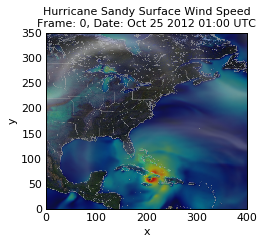
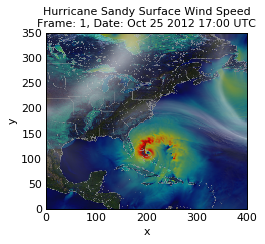
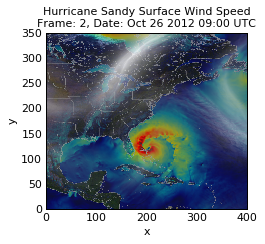

In [6]:
surface_wind[0:3]

b':HoloMap   [Frame,Date]\n   :RGB   [x,y]   (R,G,B)'
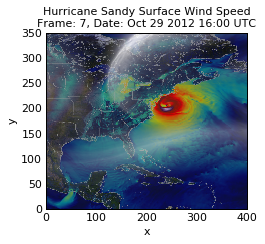
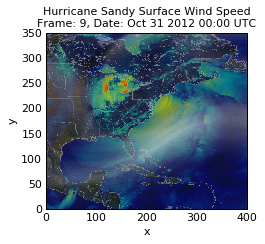
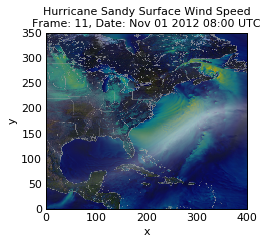
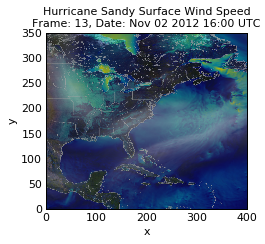

In [7]:
surface_wind[7:14:2]